## Boundary Element Method for Acoustics

### Comparison between triangular and quadrilateral constant elements

In this section, the same internal and external problem will be solved using the BEM and constant elements: triangular and quadrilateral elements. The problem which will be solved is the vibrating cylinder.

The vibrating cylinder is a classical wave propagation problem in 2D and 3D space in which an infinite cylinder is let to vibrate in a free-space domain. This problem closely resembles Green's point source perturbation of an infinite domain. 

The problem is stated as such: let an infinite acoustically rigid cylinder vibrate in an infinite acoustic domain, what is the velocity potential and acoustic pressure field in the vicinities of the cylinder, in a plane parallel to the radial direction? 

The walls of the cylinder are subjected to Neumann boundary conditions ($\frac{\partial \phi}{\partial n} = \bar{q}$). The analytical solution is

\begin{equation}\label{cyl_anal}
	\phi_{cyl} (r) = - \frac{V}{k} \frac{H_0 ^{(2)} (k r)}{H_1 ^{(2)} (k a)},
\end{equation}
where $V$ is the amplitude of the cylinder vibration (set to unity), $k$ is the wave number, $a$ is the radius of the cylinder, $r$ is the distance from the cylinder, $H_0 ^{(2)}$ and $H_1 ^{(2)}$ are the Hankel functions of second species and order 0 and 1, respectively. 

#### Internal problem - acoustic duct

In order to assess the validity of the programs, a simple internal acoustics problem will be solved using the triangular and quadrilateral elements: the acoustic duct problem. This problem consists of a cylindrical duct which can be either open on both ends, closed on one end and open on the other or closed in both ends. The analytical solution can be obtained by solving the time-harmonic wave equation by separation of variables and the resonance frequencies are given by
- closed duct on both ends
\begin{equation}
    F_{closed\ duct}\ (n,L) = \frac{\pi\ n\ c}{L}
\end{equation}
where $c$ is the wave propagation speed, $n=0,1,2,...$ is the mode number and $L$ is the length of the duct. The frequency is in rad/s, multiply it to $2\ pi$ to obtain the frequency in Hz. The duct which will be studied has length = 100 mm and diameter = 10 mm. The speed of sound is $c = 343$ m/s and only the first non-zero mode will be studied ($n=1$).

The acoustic flux is zero at the walls of the duct. So a Neumann boundary condition is applied to the whole boundary, such that $\frac{\partial \phi}{\partial n} = \bar{q}$.

In [37]:
c = 343 # Speed of propagation
F_closed(n,L,c) = n*c/L # Analytical resonance frequency in Hz
for n=1:3
    println("Mode n = $(n), L = $(L=0.1) m, F = $(F_closed(n,L,c)) Hz.")
end

Mode n = 1, L = 0.1 m, F = 3430.0 Hz.
Mode n = 2, L = 0.1 m, F = 6860.0 Hz.
Mode n = 3, L = 0.1 m, F = 10290.0 Hz.


Notice that the actual solution is simply a time and space harmonic in which the velocity potential (proportional to the acoustic pressure) assumes its maximum value at the walls of the duct. 

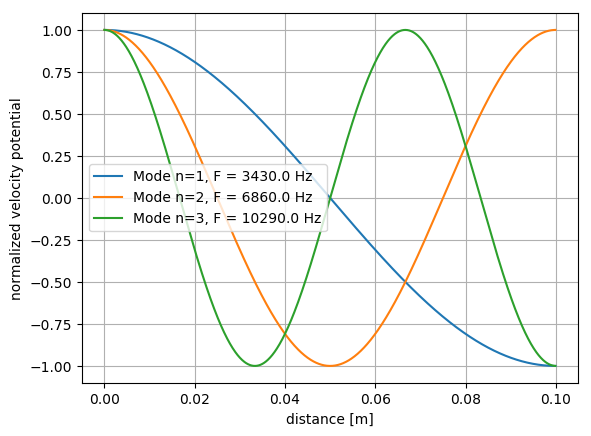

In [41]:
using PyPlot
phi_closed(x,n,L,c) = cos.(n*pi*(x./L))
x = 0.0000001:0.0001:0.1
for n =1:3
    plot(x,phi_closed(x,n,L,c),label="Mode n=$(n), F = $(F_closed(n,L,c)) Hz")
    hold(1)
    legend()
    xlabel("distance [m]")
    ylabel("normalized velocity potential")
    grid(1)
end